In [1]:
import pandas as pd
import numpy as np
from IPython.display import display_html
from sklearn.model_selection import train_test_split
from mlxtend.preprocessing import standardize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df = pd.read_csv('../data/CTGsmt with titles.csv')
dataset = df.copy()
dataset.head(2)
df_sorted = df.sort_values(by=['NSP'])

In [3]:
X = df_sorted.copy()
X.drop(['NSP'], axis=1,  inplace=True)
Y = dataset['NSP'].copy()
df_sorted

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1285,0.111111,0.111111,0.000000,0.000000,0.086957,0.186667,0.161765,0.000000,0.199211,0.000000,...,0.366972,0.043103,0.111111,0.100000,0.425197,0.376147,0.357798,0.007435,1.000000,1
1336,0.407407,0.407407,0.000000,0.010638,0.086957,0.133333,0.323529,0.000000,0.181460,0.187500,...,0.027523,0.482759,0.611111,0.000000,0.653543,0.440367,0.495413,0.375465,0.500000,1
1335,0.407407,0.407407,0.269231,0.019504,0.217391,0.133333,0.294118,0.000000,0.130178,0.312500,...,0.137615,0.448276,0.333333,0.000000,0.653543,0.495413,0.532110,0.263941,0.500000,1
1334,0.407407,0.407407,0.038462,0.003546,0.043478,0.026667,0.367647,0.000000,0.000000,0.125000,...,0.155963,0.293103,0.222222,0.000000,0.433071,0.385321,0.357798,0.163569,0.500000,1
1333,0.407407,0.407407,0.307692,0.014184,0.217391,0.120000,0.308824,0.000000,0.102564,0.437500,...,0.155963,0.448276,0.388889,0.000000,0.653543,0.486239,0.532110,0.282528,0.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,0.427914,0.427914,0.000000,0.001400,0.043478,0.781000,0.183478,0.011555,0.056410,0.148070,...,0.226012,0.177891,0.307108,0.000000,0.481971,0.406071,0.400283,0.046381,0.605147,3
3855,0.426067,0.426067,0.007751,0.026899,0.174244,0.315337,0.294118,0.000000,0.113393,0.200095,...,0.033000,0.639471,0.677016,0.000000,0.536960,0.298985,0.401611,0.459412,0.500000,3
3854,0.074074,0.074074,0.153846,0.000456,0.347826,0.746667,0.413657,0.000000,0.000000,0.399123,...,0.091743,0.612069,0.396036,0.000000,0.244094,0.123719,0.165138,0.152895,0.000000,3
3864,0.481481,0.481481,0.000000,0.000000,0.342104,0.266667,0.161765,0.000000,0.279300,0.058387,...,0.091743,0.241947,0.107455,0.286839,0.307087,0.403066,0.440367,0.229457,1.000000,3


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

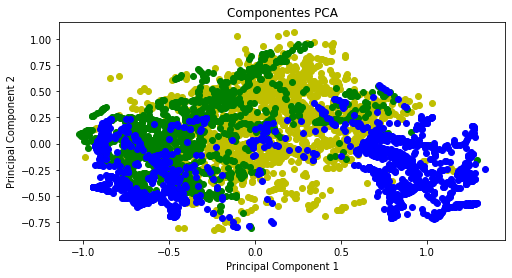

In [7]:
#PCA
pca = PCA(n_components=16)
pca.fit(X, Y)
transformada_PCA = pca.fit_transform(X, Y)

fig = plt.figure(figsize = (8,4))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Componentes PCA")
x_pca=transformada_PCA[:,0]
y_pca=transformada_PCA[:,1]
plt.scatter(x_pca[0:1654],y_pca[0:1654], color = 'y', label='high emotions')
plt.scatter(x_pca[1655:3308],y_pca[1655:3308], color = 'g')
plt.scatter(x_pca[3309:4962],y_pca[3309:4962], color = 'b')

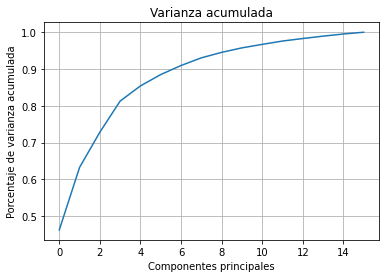

In [8]:
plt.plot(np.cumsum(pca.explained_variance_/np.sum(pca.explained_variance_)))
plt.title('Varianza acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza acumulada')
plt.grid()

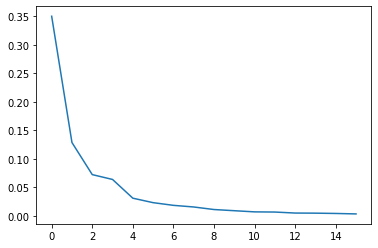

In [9]:
plt.plot(pca.explained_variance_);